# **LIBRARIES THAT WILL BE USED**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, include_bias=False)

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

!pip install catboost

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score

import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM

In [ ]:
df = pd.read_csv('telecom_fraud_detection_synthetic_data.csv')

# **DATA PRE-PROCCESING**

In [ ]:
df.head()

,User_ID,User_Type,User_Age,User_Gender,User_Region,User_Registration_Date,User_Plan_Tier,User_Lifetime_Value,User_Payment_Reliability,User_Credit_Score,...,Payment_Instrument,label,Provisioning_ID,Provisioning_Request_Time,Provisioning_Completion_Time,Provisioning_Status,Provisioning_Type,Provisioning_Channel,Provisioning_Initiator,Provisioning_Device
0,bc13c586-70b1-402b-9626-27060fd4450f,Postpaid,30,F,New Sandrafort,2021-11-30 21:35:47,Basic,9302.16,Low,490,...,Visa,NaN,c7afdc5d-8f78-4ab0-887d-fc0bfc5cca15,2023-03-25 16:03:08,2023-08-11 00:04:35,Completed,Deactivation,Online,Customer Service,Desktop
1,9ec02b56-ccac-475e-bd8e-3a9ccfd3fefd,Postpaid,56,M,East Melissahaven,2019-11-11 02:54:02,Standard,2814.50,High,836,...,MasterCard,Subscription Fraud,805a4b9a-cd93-4c86-99d5-8851ad8154a8,2023-06-03 15:35:37,2023-11-26 16:10:10,Completed,Upgrade,In-Person,User,Desktop
2,141ad213-7012-4edb-b46a-e96583fbc4ab,Postpaid,21,F,Lake Joshua,2020-04-06 20:47:15,Basic,9780.55,Medium,371,...,Other,Usage Fraud,6a37ece3-31b8-4169-86b7-fde06caf31a3,2023-03-04 21:02:39,2023-03-17 18:05:47,Failed,Activation,In-Person,User,Desktop
3,82dbf415-4a7d-4752-ab8f-8ef2a5e25aa0,Prepaid,73,Other,New Amy,2022-01-27 04:55:49,Basic,1311.06,High,504,...,Amex,Subscription Fraud,4ae9f454-e16d-4ffe-85ab-c7fe5b96e40d,2023-07-21 02:25:32,2023-08-30 03:37:18,Failed,Deactivation,In-Person,User,Mobile
4,f407144e-5241-4cb6-ae7e-542e4a046d47,Prepaid,61,M,South Brian,2020-09-20 23:03:51,Standard,4863.59,Low,388,...,Amex,Credit Abuse,0dfc6ac9-5a3d-4247-b51f-38d91d3ab450,2023-12-05 07:13:30,2023-11-08 02:23:25,Pending,Deactivation,Phone Call,Customer Service,Desktop


In [ ]:
df.tail()

,User_ID,User_Type,User_Age,User_Gender,User_Region,User_Registration_Date,User_Plan_Tier,User_Lifetime_Value,User_Payment_Reliability,User_Credit_Score,...,Payment_Instrument,label,Provisioning_ID,Provisioning_Request_Time,Provisioning_Completion_Time,Provisioning_Status,Provisioning_Type,Provisioning_Channel,Provisioning_Initiator,Provisioning_Device
4995,4efc81ee-982d-47b0-a13b-fd09739054d7,Prepaid,66,Other,South Codyborough,2022-06-24 01:37:54,Standard,9755.00,High,794,...,Other,Credit Abuse,2d7d659f-033b-4211-9e98-aebc130ab151,2023-11-07 01:18:27,2023-06-18 00:51:30,Pending,Activation,Online,Customer Service,Mobile
4996,a53446ae-59b4-40ab-8e75-2b00162bd949,Postpaid,28,M,South Vanessa,2022-02-22 05:25:32,Basic,7547.37,Low,683,...,Visa,NaN,d484fde0-6ebf-4347-84ed-4ff0a1a23268,2023-01-22 06:13:53,2023-02-22 08:18:07,Failed,Upgrade,Online,User,Desktop
4997,00d0eab1-581a-40b3-8a1a-55ecea521be6,Postpaid,51,Other,Timothyton,2020-04-16 20:20:43,Premium,2076.75,Medium,658,...,Amex,NaN,a0f8bf30-b1b2-4ece-a3b7-5503a253bbe3,2023-09-26 12:25:27,2023-08-11 08:27:08,Failed,Activation,Online,User,Mobile
4998,df9cb843-3d3f-4d54-b731-f5b8972d3e9a,Postpaid,78,Other,West Amychester,2018-01-26 21:12:36,Premium,3914.75,High,653,...,Amex,Credit Abuse,5c674d97-4194-48a8-a600-9470b688eb64,2023-09-01 20:54:59,2023-10-03 11:04:51,Completed,Upgrade,Phone Call,User,Desktop
4999,e45ac5af-3219-49f1-b604-9263c3d834f6,Prepaid,52,M,Rodriguezchester,2020-09-15 07:48:23,Premium,4683.47,Medium,757,...,Other,NaN,1a49d790-a29a-4fb4-a088-774448f29cd6,2023-01-05 00:07:44,2023-07-29 06:05:28,Completed,Deactivation,In-Person,Customer Service,Mobile


In [ ]:
df['label'].fillna('None', inplace=True)

In [ ]:
df.shape

(5000, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       5000 non-null   object 
 1   User_Type                     5000 non-null   object 
 2   User_Age                      5000 non-null   int64  
 3   User_Gender                   5000 non-null   object 
 4   User_Region                   5000 non-null   object 
 5   User_Registration_Date        5000 non-null   object 
 6   User_Plan_Tier                5000 non-null   object 
 7   User_Lifetime_Value           5000 non-null   float64
 8   User_Payment_Reliability      5000 non-null   object 
 9   User_Credit_Score             5000 non-null   int64  
 10  Subscription_ID               5000 non-null   object 
 11  Subscription_Type             5000 non-null   object 
 12  Subscription_Start_Date       5000 non-null   object 
 13  Sub

In [ ]:
df.columns

Index(['User_ID', 'User_Type', 'User_Age', 'User_Gender', 'User_Region',
       'User_Registration_Date', 'User_Plan_Tier', 'User_Lifetime_Value',
       'User_Payment_Reliability', 'User_Credit_Score', 'Subscription_ID',
       'Subscription_Type', 'Subscription_Start_Date', 'Subscription_End_Date',
       'Subscription_Status', 'Subscription_Channel',
       'Subscription_Renewal_Type', 'Call_ID', 'Call_Start_Time',
       'Call_End_Time', 'Call_Duration', 'Call_Type', 'Call_Origin',
       'Call_Destination_Type', 'Call_Destination_Number', 'Call_Cost',
       'Caller_Location', 'Callee_Location', 'Data_Session_ID',
       'Data_Session_Start_Time', 'Data_Session_End_Time', 'Data_Usage_MB',
       'Data_Cost', 'Data_Service_Type', 'Data_Roaming', 'Message_ID',
       'Message_Timestamp', 'Message_Type', 'Message_Destination_Number',
       'Message_Cost', 'Message_Length', 'Payment_ID', 'Payment_Date',
       'Payment_Amount', 'Payment_Method', 'Payment_Status',
       'Payment_Freq

In [ ]:
df.describe(include = 'all')

,User_ID,User_Type,User_Age,User_Gender,User_Region,User_Registration_Date,User_Plan_Tier,User_Lifetime_Value,User_Payment_Reliability,User_Credit_Score,...,Payment_Instrument,label,Provisioning_ID,Provisioning_Request_Time,Provisioning_Completion_Time,Provisioning_Status,Provisioning_Type,Provisioning_Channel,Provisioning_Initiator,Provisioning_Device
count,5000,5000,5000.000000,5000,5000,5000,5000,5000.000000,5000,5000.000000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,2,NaN,3,4280,5000,3,NaN,3,NaN,...,4,6,5000,4999,4998,3,3,3,2,2
top,bc13c586-70b1-402b-9626-27060fd4450f,Prepaid,NaN,M,West Michael,2021-11-30 21:35:47,Standard,NaN,Medium,NaN,...,Amex,None,c7afdc5d-8f78-4ab0-887d-fc0bfc5cca15,2023-10-08 16:37:59,2023-03-29 08:11:01,Failed,Deactivation,In-Person,Customer Service,Desktop
freq,1,2519,NaN,1676,8,1,1704,NaN,1701,NaN,...,1273,3000,1,2,2,1702,1695,1704,2517,2535
mean,NaN,NaN,48.636800,NaN,NaN,NaN,NaN,5049.151356,NaN,576.712400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,18.029229,NaN,NaN,NaN,NaN,2900.820621,NaN,157.197916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,100.280000,NaN,300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,2521.132500,NaN,442.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,5077.515000,NaN,580.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,7544.110000,NaN,710.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

0

# **Exploratory Data Analysis**

**Plotting The Label Count To Show Imbalanced Dataset**

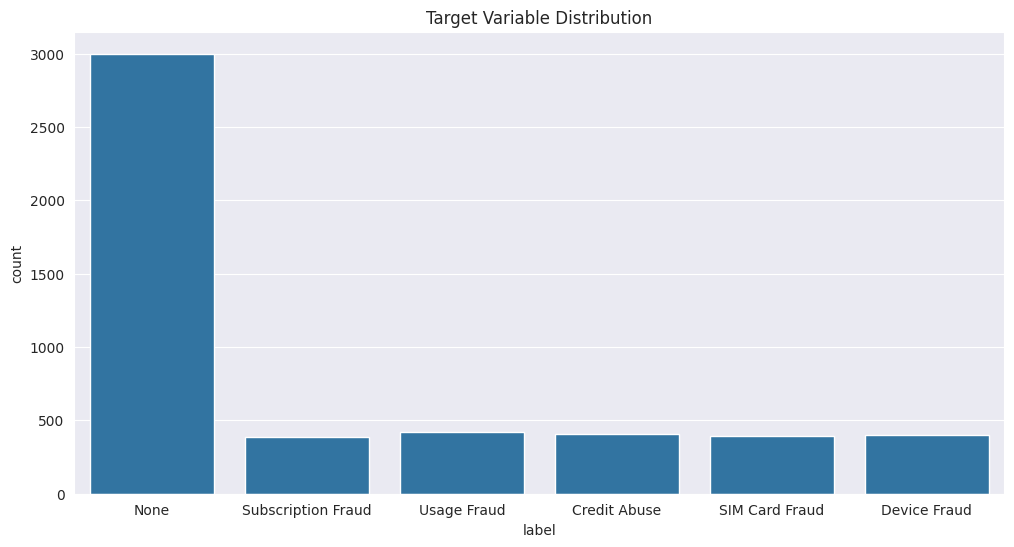

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'label', data = df)
plt.title('Target Variable Distribution')
plt.show()

# **Pie Charts**

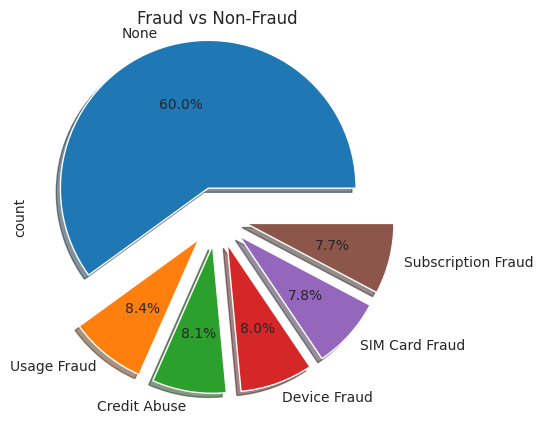

In [ ]:
import matplotlib.pyplot as plt

fraud_counts = df['label'].value_counts()

explode = [0.2] * len(fraud_counts)

fraud_counts.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)

plt.title('Fraud vs Non-Fraud')

plt.show()


In [ ]:
print(df['label'].value_counts())

label
None                  3000
Usage Fraud            419
Credit Abuse           405
Device Fraud           398
SIM Card Fraud         391
Subscription Fraud     387
Name: count, dtype: int64


# **Encoding Categorical Values**

In [ ]:
le = LabelEncoder()
df['User_ID'] = le.fit_transform(df['User_ID'])
df['User_Type'] = le.fit_transform(df['User_Type'])
df['User_Age'] = le.fit_transform(df['User_Age'])
df['User_Gender'] = le.fit_transform(df['User_Gender'])
df['User_Region'] = le.fit_transform(df['User_Region'])

df['User_Registration_Date'] = le.fit_transform(df['User_Registration_Date'])
df['User_Plan_Tier'] = le.fit_transform(df['User_Plan_Tier'])
df['User_Lifetime_Value'] = le.fit_transform(df['User_Lifetime_Value'])
df['User_Payment_Reliability'] = le.fit_transform(df['User_Payment_Reliability'])
df['User_Credit_Score'] = le.fit_transform(df['User_Credit_Score'])

df['Subscription_ID'] = le.fit_transform(df['Subscription_ID'])
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])
df['Subscription_Start_Date'] = le.fit_transform(df['Subscription_Start_Date'])
df['Subscription_End_Date'] = le.fit_transform(df['Subscription_End_Date'])
df['Subscription_Status'] = le.fit_transform(df['Subscription_Status'])
df['Subscription_Channel'] = le.fit_transform(df['Subscription_Channel'])
df['Subscription_Renewal_Typey'] = le.fit_transform(df['Subscription_Renewal_Type'])

df['Call_ID'] = le.fit_transform(df['Call_ID'])
df['Call_Start_Time'] = le.fit_transform(df['Call_Start_Time'])
df['Call_End_Time'] = le.fit_transform(df['Call_End_Time'])
df['Call_Duration'] = le.fit_transform(df['Call_Duration'])
df['Call_Type'] = le.fit_transform(df['Call_Type'])
df['Call_Origin'] = le.fit_transform(df['Call_Origin'])

df['Call_Destination_Type'] = le.fit_transform(df['Call_Destination_Type'])
df['Call_Destination_Number'] = le.fit_transform(df['Call_Destination_Number'])
df['Call_Cost'] = le.fit_transform(df['Call_Cost'])
df['Caller_Location'] = le.fit_transform(df['Caller_Location'])
df['Callee_Location'] = le.fit_transform(df['Callee_Location'])

df['Data_Session_ID'] = le.fit_transform(df['Data_Session_ID'])
df['Data_Session_Start_Time'] = le.fit_transform(df['Data_Session_Start_Time'])
df['Data_Session_End_Time'] = le.fit_transform(df['Data_Session_End_Time'])
df['Data_Usage_MB'] = le.fit_transform(df['Data_Usage_MB'])
df['Data_Cost'] = le.fit_transform(df['Data_Cost'])
df['Data_Service_Type'] = le.fit_transform(df['Data_Service_Type'])
df['Data_Roaming'] = le.fit_transform(df['Data_Roaming'])

df['Message_ID'] = le.fit_transform(df['Message_ID'])
df['Message_Timestamp'] = le.fit_transform(df['Message_Timestamp'])
df['Message_Type'] = le.fit_transform(df['Message_Type'])
df['Message_Destination_Number'] = le.fit_transform(df['Message_Destination_Number'])
df['Message_Cost'] = le.fit_transform(df['Message_Cost'])
df['Message_Length'] = le.fit_transform(df['Message_Length'])

df['Payment_ID'] = le.fit_transform(df['Payment_ID'])
df['Payment_Date'] = le.fit_transform(df['Payment_Date'])
df['Payment_Amount'] = le.fit_transform(df['Payment_Amount'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
df['Payment_Status'] = le.fit_transform(df['Payment_Status'])
df['Payment_Frequency'] = le.fit_transform(df['Payment_Frequency'])
df['Payment_Origin'] = le.fit_transform(df['Payment_Origin'])
df['Payment_Instrument'] = le.fit_transform(df['Payment_Instrument'])
df['label'] = le.fit_transform(df['label'])

df['Provisioning_ID'] = le.fit_transform(df['Provisioning_ID'])
df['Provisioning_Request_Time'] = le.fit_transform(df['Provisioning_Request_Time'])
df['Provisioning_Completion_Time'] = le.fit_transform(df['Provisioning_Completion_Time'])
df['Provisioning_Status'] = le.fit_transform(df['Provisioning_Status'])
df['Provisioning_Type'] = le.fit_transform(df['Provisioning_Type'])
df['Provisioning_Channel'] = le.fit_transform(df['Provisioning_Channel'])
df['Provisioning_Initiator'] = le.fit_transform(df['Provisioning_Initiator'])
df['Provisioning_Device'] = le.fit_transform(df['Provisioning_Device'])

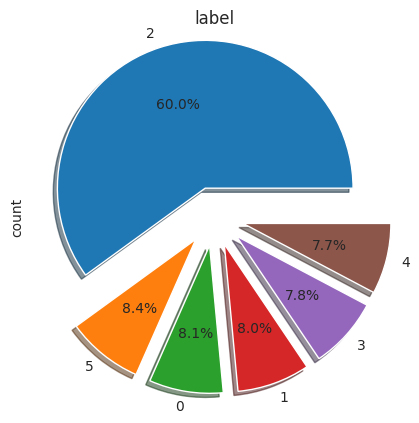

In [ ]:

label_counts = df['label'].value_counts()
explode = [0.2] * len(label_counts)

label_counts.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)

plt.title('label')

plt.show()


In [ ]:
data=df.drop_duplicates()

In [ ]:
cols_to_convert = ['label']
data[cols_to_convert] = data[cols_to_convert].astype(float)
data.head()

,User_ID,User_Type,User_Age,User_Gender,User_Region,User_Registration_Date,User_Plan_Tier,User_Lifetime_Value,User_Payment_Reliability,User_Credit_Score,...,label,Provisioning_ID,Provisioning_Request_Time,Provisioning_Completion_Time,Provisioning_Status,Provisioning_Type,Provisioning_Channel,Provisioning_Initiator,Provisioning_Device,Subscription_Renewal_Typey
0,3615,0,12,0,2325,3272,0,4603,1,190,...,2.0,3923,1201,3100,0,1,1,0,0,0
1,3066,0,38,1,759,1633,2,1400,0,536,...,4.0,2506,2122,4493,0,2,0,1,0,0
2,384,0,3,0,1605,1953,0,4860,2,71,...,5.0,2098,895,1001,1,0,0,1,0,1
3,2530,1,55,2,2082,3411,0,659,0,204,...,4.0,1512,2782,3342,1,1,0,1,1,1
4,4758,1,43,1,3467,2302,2,2375,1,88,...,0.0,301,4664,4253,2,1,2,0,0,0


In [ ]:
data.head()

,User_ID,User_Type,User_Age,User_Gender,User_Region,User_Registration_Date,User_Plan_Tier,User_Lifetime_Value,User_Payment_Reliability,User_Credit_Score,...,label,Provisioning_ID,Provisioning_Request_Time,Provisioning_Completion_Time,Provisioning_Status,Provisioning_Type,Provisioning_Channel,Provisioning_Initiator,Provisioning_Device,Subscription_Renewal_Typey
0,3615,0,12,0,2325,3272,0,4603,1,190,...,2.0,3923,1201,3100,0,1,1,0,0,0
1,3066,0,38,1,759,1633,2,1400,0,536,...,4.0,2506,2122,4493,0,2,0,1,0,0
2,384,0,3,0,1605,1953,0,4860,2,71,...,5.0,2098,895,1001,1,0,0,1,0,1
3,2530,1,55,2,2082,3411,0,659,0,204,...,4.0,1512,2782,3342,1,1,0,1,1,1
4,4758,1,43,1,3467,2302,2,2375,1,88,...,0.0,301,4664,4253,2,1,2,0,0,0


In [ ]:
pd.DataFrame(data.nunique(), columns = ["Number of unique values"])

,Number of unique values
User_ID,5000
User_Type,2
User_Age,63
User_Gender,3
User_Region,4280
User_Registration_Date,5000
User_Plan_Tier,3
User_Lifetime_Value,4986
User_Payment_Reliability,3
User_Credit_Score,551


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       5000 non-null   int64  
 1   User_Type                     5000 non-null   int64  
 2   User_Age                      5000 non-null   int64  
 3   User_Gender                   5000 non-null   int64  
 4   User_Region                   5000 non-null   int64  
 5   User_Registration_Date        5000 non-null   int64  
 6   User_Plan_Tier                5000 non-null   int64  
 7   User_Lifetime_Value           5000 non-null   int64  
 8   User_Payment_Reliability      5000 non-null   int64  
 9   User_Credit_Score             5000 non-null   int64  
 10  Subscription_ID               5000 non-null   int64  
 11  Subscription_Type             5000 non-null   int64  
 12  Subscription_Start_Date       5000 non-null   int64  
 13  Sub

In [ ]:
le = LabelEncoder()
data['Subscription_Renewal_Type'] = le.fit_transform(data['Subscription_Renewal_Type'])

In [ ]:
data['Subscription_Renewal_Type'].head()

,Subscription_Renewal_Type
0,0
1,0
2,1
3,1
4,0


In [ ]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('label')

In [ ]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
data.head()

,User_ID,User_Type,User_Age,User_Gender,User_Region,User_Registration_Date,User_Plan_Tier,User_Lifetime_Value,User_Payment_Reliability,User_Credit_Score,...,label,Provisioning_ID,Provisioning_Request_Time,Provisioning_Completion_Time,Provisioning_Status,Provisioning_Type,Provisioning_Channel,Provisioning_Initiator,Provisioning_Device,Subscription_Renewal_Typey
0,0.772841,-1.007629,-1.033803,-1.222548,0.131632,0.535204,-1.242078,1.465587,-0.012707,-0.551668,...,2.0,0.986230,-0.899659,0.416852,-1.216162,0.000246,0.021604,-0.993223,-0.986097,-1.00441
1,0.392483,-1.007629,0.408444,0.003925,-1.144680,-0.600329,1.206814,-0.759816,-1.234500,1.649599,...,4.0,0.004503,-0.261437,1.382333,-1.216162,1.230229,-1.205884,1.006823,-0.986097,-1.00441
2,-1.465661,-1.007629,-1.533042,-1.222548,-0.455178,-0.378626,-1.242078,1.644147,1.209086,-1.308751,...,5.0,-0.278167,-1.111707,-1.037954,0.015270,-1.229737,-1.205884,1.006823,-0.986097,0.99561
3,0.021131,0.992429,1.351452,1.230397,-0.066417,0.631506,-1.242078,-1.274653,-1.234500,-0.462599,...,4.0,-0.684160,0.195922,0.584580,0.015270,0.000246,-1.205884,1.006823,1.014099,0.99561
4,1.564735,0.992429,0.685800,0.003925,1.062377,-0.136832,1.206814,-0.082399,-0.012707,-1.200597,...,0.0,-1.523166,1.500086,1.215990,1.246701,0.000246,1.249092,-0.993223,-0.986097,-1.00441


In [ ]:
interaction_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features_df = interaction_features.fit_transform(data.drop(columns=['label']))
interaction_features_df = pd.DataFrame(interaction_features_df, columns=interaction_features.get_feature_names_out(data.drop(columns=['label']).columns))

In [ ]:
interaction_features_df

,User_ID,User_Type,User_Age,User_Gender,User_Region,User_Registration_Date,User_Plan_Tier,User_Lifetime_Value,User_Payment_Reliability,User_Credit_Score,...,Provisioning_Type Provisioning_Channel,Provisioning_Type Provisioning_Initiator,Provisioning_Type Provisioning_Device,Provisioning_Type Subscription_Renewal_Typey,Provisioning_Channel Provisioning_Initiator,Provisioning_Channel Provisioning_Device,Provisioning_Channel Subscription_Renewal_Typey,Provisioning_Initiator Provisioning_Device,Provisioning_Initiator Subscription_Renewal_Typey,Provisioning_Device Subscription_Renewal_Typey
0,0.772841,-1.007629,-1.033803,-1.222548,0.131632,0.535204,-1.242078,1.465587,-0.012707,-0.551668,...,0.000005,-0.000244,-0.000243,-0.000247,-0.021457,-0.021303,-0.021699,0.979414,0.997603,0.990445
1,0.392483,-1.007629,0.408444,0.003925,-1.144680,-0.600329,1.206814,-0.759816,-1.234500,1.649599,...,-1.483514,1.238624,-1.213125,-1.235654,-1.214112,1.189118,1.211202,-0.992825,-1.011263,0.990445
2,-1.465661,-1.007629,-1.533042,-1.222548,-0.455178,-0.378626,-1.242078,1.644147,1.209086,-1.308751,...,1.482921,-1.238128,1.212640,-1.224339,-1.214112,1.189118,-1.200590,-0.992825,1.002403,-0.981767
3,0.021131,0.992429,1.351452,1.230397,-0.066417,0.631506,-1.242078,-1.274653,-1.234500,-0.462599,...,-0.000297,0.000248,0.000249,0.000245,-1.214112,-1.222887,-1.200590,1.021019,1.002403,1.009647
4,1.564735,0.992429,0.685800,0.003925,1.062377,-0.136832,1.206814,-0.082399,-0.012707,-1.200597,...,0.000307,-0.000244,-0.000243,-0.000247,-1.240627,-1.231725,-1.254600,0.979414,0.997603,0.990445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.670996,0.992429,0.963155,1.230397,1.084383,0.853901,1.206814,1.629557,-1.234500,1.382393,...,-0.026567,1.221404,-1.247076,-1.224339,-0.021457,0.021908,0.021509,-1.007227,-0.988862,1.009647
4996,0.481857,-1.007629,-1.144745,0.003925,1.276726,0.673768,-1.242078,0.869460,-0.012707,0.676206,...,0.026578,1.238624,-1.213125,1.224828,0.021751,-0.021303,0.021509,-0.992825,1.002403,-0.981767
4997,-1.720619,-1.007629,0.131089,1.230397,1.368822,-0.355763,-0.017632,-1.002991,1.209086,0.517155,...,-0.026567,-1.238128,-1.247076,1.235160,0.021751,0.021908,-0.021699,1.021019,-1.011263,-1.018571
4998,1.266822,-1.007629,1.628807,1.230397,1.456844,-1.682514,-0.017632,-0.386715,-1.234500,0.485345,...,1.536670,1.238624,-1.213125,-1.235654,1.257615,-1.231725,-1.254600,-0.992825,-1.011263,0.990445


# **Handling Data Imbalance**

In [ ]:
X=data.drop(['label'],axis=1)
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled = pd.DataFrame(X_train_res, columns=X.columns)
y_train_resampled = pd.Series(y_train_res)

In [ ]:
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [ ]:
print("Original dataset:")
print(df['label'].value_counts())

Original dataset:
label
2    3000
5     419
0     405
1     398
3     391
4     387
Name: count, dtype: int64


In [ ]:
print("\nResampled dataset:")
print(df_resampled['label'].value_counts())


Resampled dataset:
label
4.0    2101
2.0    2101
1.0    2101
5.0    2101
0.0    2101
3.0    2101
Name: count, dtype: int64


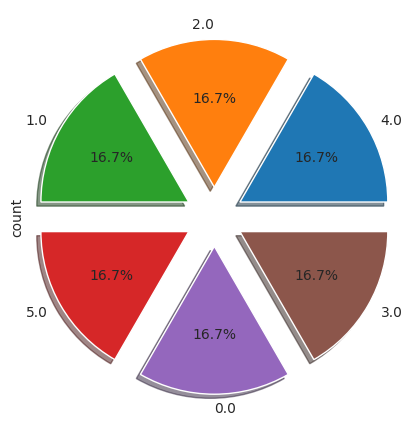

In [ ]:
label_counts = df_resampled['label'].value_counts()
explode = [0.2] * len(label_counts)

label_counts.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)

plt.title(' ')

plt.show()

In [ ]:
X = df_resampled.drop('label', axis=1)
y = df_resampled['label']

print('X Shape: ', X.shape)
print('y Shape: ', y.shape)

X Shape:  (12606, 58)
y Shape:  (12606,)


# **SPLITTING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8824, 58), (3782, 58), (8824,), (3782,))

# **Training**

**Encode The Labels**

In [ ]:
label_encoder = LabelEncoder()
df_resampled['label'] = label_encoder.fit_transform(df_resampled['label'])

**Input Features & Target**

In [ ]:
X = df_resampled.drop('label', axis=1)
y = df_resampled['label']

**Split The Dataset Into Training & Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, silent=True, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'LGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'XGB': XGBClassifier(n_estimators=100, random_state=42)
}


**Train & Evaluate Each Ensemble Classifier**

Applying RandomForest model on the encoded data
Accuracy score of RandomForest : 0.95
                                                          
ROC-AUC Score of RandomForest: 0.99
                                                           
Average Precision-Recall Score of RandomForest: 0.96
                                                            

RandomForest Classification report 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       648
           1       0.98      0.94      0.96       637
           2       0.82      0.96      0.88       630
           3       0.98      0.95      0.96       631
           4       0.98      0.96      0.97       615
           5       0.97      0.94      0.96       621

    accuracy                           0.95      3782
   macro avg       0.95      0.95      0.95      3782
weighted avg       0.95      0.95      0.95      3782



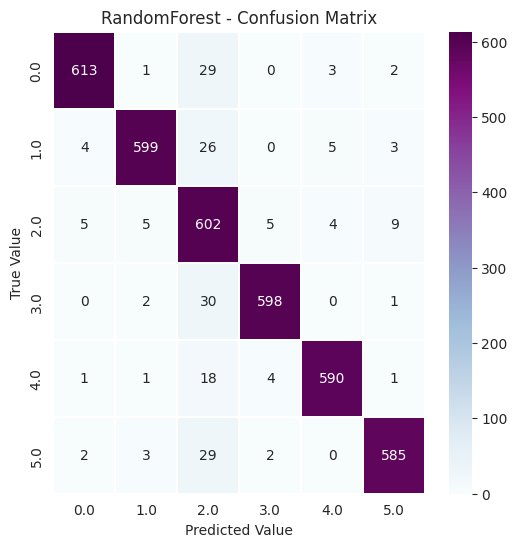

Applying CatBoost model on the encoded data
Accuracy score of CatBoost : 0.83
                                                          
ROC-AUC Score of CatBoost: 0.97
                                                           
Average Precision-Recall Score of CatBoost: 0.89
                                                            

CatBoost Classification report 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       648
           1       0.85      0.83      0.84       637
           2       0.70      0.86      0.77       630
           3       0.87      0.81      0.84       631
           4       0.83      0.82      0.82       615
           5       0.85      0.84      0.84       621

    accuracy                           0.83      3782
   macro avg       0.83      0.83      0.83      3782
weighted avg       0.83      0.83      0.83      3782



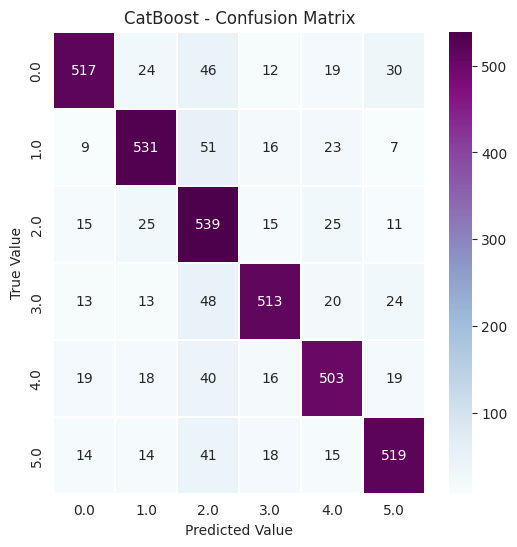

Applying SVC model on the encoded data
Accuracy score of SVC : 0.95
                                                          
ROC-AUC Score of SVC: 1.00
                                                           
Average Precision-Recall Score of SVC: 0.98
                                                            

SVC Classification report 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       648
           1       0.97      0.95      0.96       637
           2       0.82      0.93      0.87       630
           3       0.99      0.96      0.97       631
           4       0.99      0.97      0.98       615
           5       0.99      0.95      0.97       621

    accuracy                           0.95      3782
   macro avg       0.95      0.95      0.95      3782
weighted avg       0.95      0.95      0.95      3782



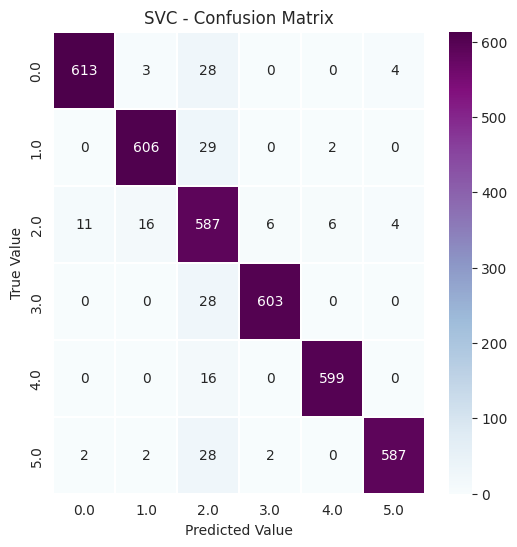

Applying LGBM model on the encoded data
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14789
[LightGBM] [Info] Number of data points in the train set: 8824, number of used features: 58
[LightGBM] [Info] Start training from score -1.803845
[LightGBM] [Info] Start training from score -1.796303
[LightGBM] [Info] Start training from score -1.791533
[LightGBM] [Info] Start training from score -1.792213
[LightGBM] [Info] Start training from score -1.781387
[LightGBM] [Info] Start training from score -1.785433
Accuracy score of LGBM : 0.89
                                                          
ROC-AUC Score of LGBM: 0.98
                                                           
Average Precision-Recall Score of LGBM: 0.94
                                                            

LGBM Classification report 
               precision    recall 

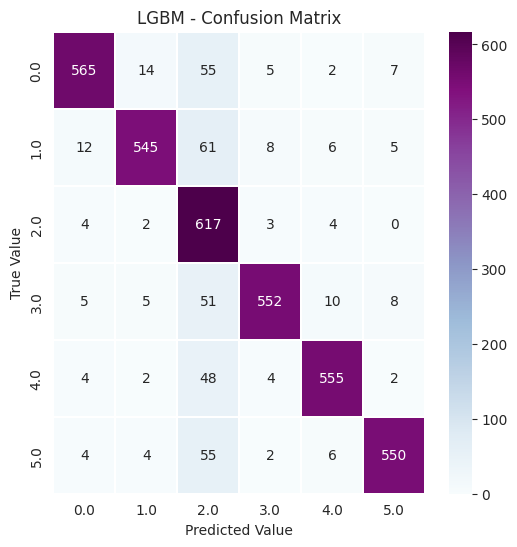

Applying AdaBoost model on the encoded data
Accuracy score of AdaBoost : 0.36
                                                          
ROC-AUC Score of AdaBoost: 0.68
                                                           
Average Precision-Recall Score of AdaBoost: 0.31
                                                            

AdaBoost Classification report 
               precision    recall  f1-score   support

           0       0.30      0.21      0.25       648
           1       0.27      0.19      0.23       637
           2       0.60      0.86      0.70       630
           3       0.28      0.27      0.27       631
           4       0.28      0.35      0.31       615
           5       0.30      0.27      0.28       621

    accuracy                           0.36      3782
   macro avg       0.34      0.36      0.34      3782
weighted avg       0.34      0.36      0.34      3782



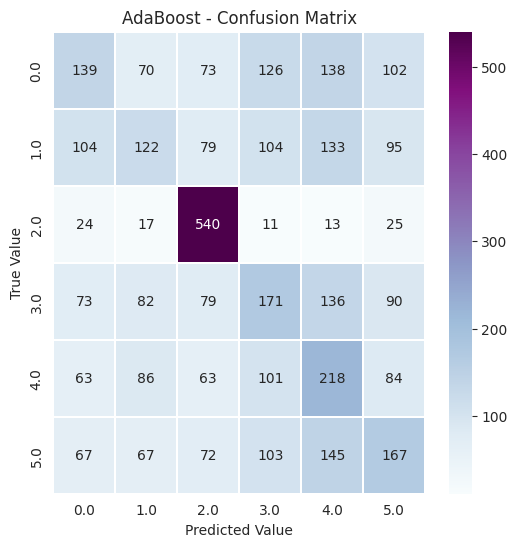

Applying XGB model on the encoded data
Accuracy score of XGB : 0.92
                                                          
ROC-AUC Score of XGB: 0.99
                                                           
Average Precision-Recall Score of XGB: 0.96
                                                            

XGB Classification report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       648
           1       0.97      0.90      0.93       637
           2       0.76      0.98      0.85       630
           3       0.97      0.92      0.95       631
           4       0.96      0.93      0.95       615
           5       0.96      0.89      0.92       621

    accuracy                           0.92      3782
   macro avg       0.93      0.92      0.92      3782
weighted avg       0.93      0.92      0.92      3782



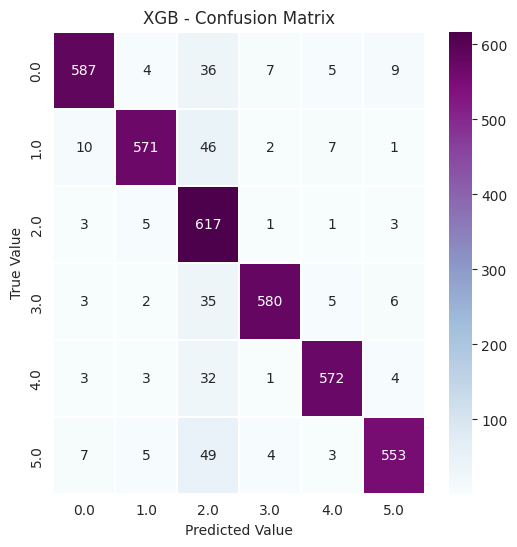

In [ ]:
for name, clf in classifiers.items():
    print(f"Applying {name} model on the encoded data")

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    y_proba = clf.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    average_precision = average_precision_score(y_test, y_proba, average="macro")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Accuracy score of {name} : {accuracy:.2f}")
    print("                                                          ")

    print(f"ROC-AUC Score of {name}: {roc_auc:.2f}")
    print("                                                           ")

    print(f"Average Precision-Recall Score of {name}: {average_precision:.2f}")
    print("                                                            ")

    print(f"\n{name} Classification report \n {classification_report(y_test, y_pred)}")

    labels = label_encoder.classes_
    plt.figure(figsize=(6, 6))
    sns.heatmap(pd.DataFrame(conf_matrix), xticklabels=labels, yticklabels=labels,
                linewidths=0.05, annot=True, fmt="d", cmap='BuPu')

    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel('True Value')
    plt.xlabel('Predicted Value')
    plt.show()

# **Deep Learning**

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train The Deep Learning Model**

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1789 - loss: -38.2261 - val_accuracy: 0.1666 - val_loss: -925.1652
Epoch 2/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1623 - loss: -3402.5032 - val_accuracy: 0.1666 - val_loss: -21210.7012
Epoch 3/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1725 - loss: -39789.1328 - val_accuracy: 0.1666 - val_loss: -121109.2109
Epoch 4/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1724 - loss: -179101.4531 - val_accuracy: 0.1666 - val_loss: -395626.9062
Epoch 5/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1705 - loss: -518095.0625 - val_accuracy: 0.1666 - val_loss: -962467.6250
Epoch 6/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1669 - loss: -1187489.5000 - val_accuracy: 0.1666 - val_loss: -1950427.8750
Epoch 7/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1623 - loss: -2296053.5000 - val_accuracy: 0.1666 - val_loss: -3526815.2500
Epoch 8/200
221/221 

In [ ]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

y_pred_proba = model.predict(X_test)

y_pred = np.argmax(y_pred_proba, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

if y_pred_proba.shape[1] == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC AUC: {roc_auc:.4f}")
else:
    print("Mismatch between number of classes in y_test and y_pred_proba")

print(f"Evaluation for Multi-Class Classification:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("-----")


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mismatch between number of classes in y_test and y_pred_proba
Evaluation for Multi-Class Classification:
Accuracy: 0.1713
Precision (Macro): 0.0286
Recall (Macro): 0.1667
F1 Score (Macro): 0.0488
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)


lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train_lstm.shape[2]), activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1669 - loss: -4.4144 - val_accuracy: 0.1666 - val_loss: -120.3133
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1643 - loss: -314.1465 - val_accuracy: 0.1666 - val_loss: -1375.9888
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1609 - loss: -2160.8237 - val_accuracy: 0.1666 - val_loss: -5016.8198
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1708 - loss: -6540.2197 - val_accuracy: 0.1666 - val_loss: -12104.4521
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1620 - loss: -15228.3623 - val_accuracy: 0.1666 - val_loss: -23304.0039
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1573 - loss: -27580.3672 - val_accuracy: 0.1666 - val_loss: -39215.8516
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1666 - loss: -46836.4922 - val_accuracy: 0.1666 - val_loss: -60333.3828
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━

In [ ]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

y_pred_lstm_proba = lstm_model.predict(X_test_lstm)

y_pred_lstm = np.argmax(y_pred_lstm_proba, axis=1)

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm, average='macro')
recall_lstm = recall_score(y_test, y_pred_lstm, average='macro')
f1_lstm = f1_score(y_test, y_pred_lstm, average='macro')

if y_pred_lstm_proba.shape[1] == len(np.unique(y_test)):
    roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm_proba, multi_class='ovr')
    print(f"ROC AUC: {roc_auc_lstm:.4f}")
else:
    print("Mismatch between the number of classes in y_test and y_pred_lstm_proba")

print(f"Evaluation for LSTM Model:")
print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"Precision (Macro): {precision_lstm:.4f}")
print(f"Recall (Macro): {recall_lstm:.4f}")
print(f"F1 Score (Macro): {f1_lstm:.4f}")


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mismatch between the number of classes in y_test and y_pred_lstm_proba
Evaluation for LSTM Model:
Accuracy: 0.1713
Precision (Macro): 0.0286
Recall (Macro): 0.1667
F1 Score (Macro): 0.0488


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1627 - loss: -831.6788 - val_accuracy: 0.1666 - val_loss: -12411.2295
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1657 - loss: -27549.9355 - val_accuracy: 0.1666 - val_loss: -105710.7344
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1660 - loss: -153928.1562 - val_accuracy: 0.1666 - val_loss: -353593.1250
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1693 - loss: -458931.2188 - val_accuracy: 0.1666 - val_loss: -819881.1250
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1656 - loss: -981724.3750 - val_accuracy: 0.1666 - val_loss: -1546782.7500
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1638 - loss: -1794762.5000 - val_accuracy: 0.1666 - val_loss: -2586761.7500
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1665 - loss: -2870887.0000 - val_accuracy: 0.1666 - val_loss: -3957891.7500
Epoch 8/100


In [ ]:
y_pred_cnn_proba = cnn_model.predict(X_test)
y_pred_cnn = (y_pred_cnn_proba > 0.5).astype(int)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, average='macro')
recall_cnn = recall_score(y_test, y_pred_cnn, average='macro')
f1_cnn = f1_score(y_test, y_pred_cnn, average='macro')

if y_pred_cnn_proba.shape[1] == len(np.unique(y_test)):
    roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn_proba, multi_class='ovr')
    print(f"ROC AUC: {roc_auc_cnn:.4f}")
else:
    print("Mismatch between the number of classes in y_test and y_pred_cnn_proba")

print(f"Evaluation for CNN Model:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision (Macro): {precision_cnn:.4f}")
print(f"Recall (Macro): {recall_cnn:.4f}")
print(f"F1 Score (Macro): {f1_cnn:.4f}")


Mismatch between the number of classes in y_test and y_pred_cnn_proba
Evaluation for CNN Model:
Accuracy: 0.1684
Precision (Macro): 0.0281
Recall (Macro): 0.1667
F1 Score (Macro): 0.0481


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
